# Individual Planning Stage (DSCI 100 Group Project)
Student Name: Vicky Tan

Student Number: 97847115

In [2]:
library(tidyverse)
library(lubridate)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. Data Description

### Dataset #1: players.csv

In [3]:
url_players <- "https://raw.githubusercontent.com/vckytn22/DSCI-100-004-27-Individual-Planning-Stage-Vicky-Tan/refs/heads/main/players.csv"
players_data <- read_csv(url_players)
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [4]:
age_summary <- players_data |>
    summarize(
        mean_age = round(mean(Age, na.rm = TRUE), 2),
        median_age = round(median(Age, na.rm = TRUE), 2),
        standard_deviation_age = round(sd(Age, na.rm = TRUE), 2),
        min_age = round(min(Age, na.rm = TRUE), 2),
        max_age = round(max(Age, na.rm = TRUE), 2))
age_summary

mean_age,median_age,standard_deviation_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,19,7.39,9,58


In [5]:
played_hours_summary <- players_data |>
    summarize(
        mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
        median_played_hours = round(median(played_hours, na.rm = TRUE), 2),
        standard_deviation_played_hours = round(sd(played_hours, na.rm = TRUE), 2),
        min_played_hours = round(min(played_hours, na.rm = TRUE), 2),
        max_played_hours = round(max(played_hours, na.rm = TRUE), 2))
played_hours_summary

mean_played_hours,median_played_hours,standard_deviation_played_hours,min_played_hours,max_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0.1,28.36,0,223.1


### Summary Statistics for Dataset #1
Origin
- dataset details the identity of players was collected through the recording of players' actions in Minecraft servers
- collected by Pacific Laboratory of Artificial Intelligence (PLAI), a research group in Computer Science at the University of British Columbia led by Frank Wood
  
Overall Summary
- 196 observations
- 7 variables

Name of Variables and Types
- experience is character type, meaning it represents text values
- subscribe is logical type, meaning it contains boolean values, TRUE or FALSE, for each corresponding observation
- hashedEmail is character type, meaning it stores text values
- played_hours is double(numeric) type, meaning it records decimal numbers
- name is character type, meaning it displays text values
- gender is characer type, meaning it shows text values
- Age is double(numeric) type, meaning it shows numbers and in this case integers

Variable Description
- experience is the level of expertise
- subscribe is whether or not the player has a subcription
- hashedEmail is their email identifier
- played_hours is the number of hours spent on the game
- name is the player's name
- gender is the player's gender
- Age is the player's age in years

Numerical Summary of played_hours in Table Below

In [6]:
played_hours_summary <- players_data |>
    summarize(
        mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
        median_played_hours = round(median(played_hours, na.rm = TRUE), 2),
        standard_deviation_played_hours = round(sd(played_hours, na.rm = TRUE), 2),
        min_played_hours = round(min(played_hours, na.rm = TRUE), 2),
        max_played_hours = round(max(played_hours, na.rm = TRUE), 2))
played_hours_summary

mean_played_hours,median_played_hours,standard_deviation_played_hours,min_played_hours,max_played_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.85,0.1,28.36,0,223.1


Numerical Summary of Age in Table Below

In [7]:
age_summary <- players_data |>
    summarize(
        mean_age = round(mean(Age, na.rm = TRUE), 2),
        median_age = round(median(Age, na.rm = TRUE), 2),
        standard_deviation_age = round(sd(Age, na.rm = TRUE), 2),
        min_age = min(Age, na.rm = TRUE),
        max_age = max(Age, na.rm = TRUE))
age_summary

mean_age,median_age,standard_deviation_age,min_age,max_age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,19,7.39,9,58


Potential Issues
- median_played_hours is 0.1, suggesting the majority of observations report 0 played hours
  - may present some difficulty in analyzing played_hours as the data is highly skewed towards no play time, which results in limited variation

### Dataset #2: sessions.csv

In [8]:
url_sessions <- "https://raw.githubusercontent.com/vckytn22/DSCI-100-004-27-Individual-Planning-Stage-Vicky-Tan/refs/heads/main/sessions.csv"
sessions_data <- read_csv(url_sessions)
head(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Summary Statistics for Dataset #2

Origin
- dataset records the exact start and end times, including dates, of each player's gaming session
  - formatted in DD/MM/YYYY HH/MM and UNIX time
- collected by Pacific Laboratory of Artificial Intelligence (PLAI), a research group in Computer Science at the University of British Columbia led by Frank Wood
  
Overall Summary
- 1535 observations
- 5 variables

Name of Variables and Types
- hashedEmail is character type, meaning it stores text values
- start_time and end_time are character types, meaning they contain text values
  - however, they can be converted into POSIXct, a date-time class in R
  - as.Date and as.hour functions can also be used to convert data for more time focussed analysis
- original_start_time and original_end_time are double (numeric type), meaning numerals that represent the miliseconds

Variable Description
- hashedEmail is their email identifier
- start_time is the time when the player started gaming, down to the exact minute of the date
- end_time is the time when the player stopped gaming, down to the exact minute of the date
- original_start_time is the game's start in UNIX format
- original_end_time is the game's end in UNIX format

Numerical Summary of Session Length in Table Below
- start_time and end_time were converted into POSIXct format
- session length is double(numeric) type, representing the duration of one session in minutes
    - this variable shows how long players game per session
    - this was done because calculating the summary statistics of the time of day or date in the year is not straightforward and entirely logical

In [13]:
sessions_data_converted <- sessions_data |>
    mutate(
    start_time = dmy_hm(start_time),
    end_time = dmy_hm(end_time))
session_length_data <- sessions_data_converted |>
    mutate(session_length = as.numeric(difftime(end_time, start_time, units = "mins")))

session_length_summary <- session_length_data |>
    summarize(
        mean_session_length = round(mean(session_length, na.rm = TRUE), 2),
        median_session_length = round(median(session_length, na.rm = TRUE), 2),
        standard_deivation_session_length = round(sd(session_length, na.rm = TRUE), 2),
        min_session_length = min(session_length, na.rm = TRUE),
        max_session_length = max(session_length, na.rm = TRUE))
session_length_summary

mean_session_length,median_session_length,standard_deivation_session_length,min_session_length,max_session_length
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
50.86,30,55.57,3,259


## 2. Questions

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question: Can played_hours, age, and experience predict if a player is subscribed to the game? 



### How the Data will Address the Question of Interest
- I will be utilizing variables from both datasets to provide a broader perspective through multiple variables.
- Session length is indicative of the player's liking of the game and their engagement habits.
    - Longer session lengths should correspond to a higher chance of subscription.
- Age can influence a player's financial ability to subscribe to the game, the amount of time they can devote to playing, and their likelihood of enjoying it, as Minecraft's primary target audience is children and teenagers.
    - Thus, several insights on subscription can be made with age.
- Experience, though subjective, can inform on skill and engagement level.
    - More skillful players, Pro or Veteran, have a higher chance of being subscribed.

### Wrangling Data
- I plan organize my three variables in a single tidy data table.
- Session length has already been transformed from start and end time.
- Thus, session length and age are numeric predictors that can be used in K-nearest-neighbours (KNN) classification.
- The experience variable will be explored through bar plots.

DO I HAVE TO JUSTIFY DROPPING CERTAIN VARIABLES

## 3. Exploratory Data Analysis and Description

The two datasets have already been loaded into R in section 1, data description. This was done because it was necessary to determine their numerical summary statistics. 

### Wrangling Data into Tidy Format Below

Thought Process for Session Length Data Wrangling
- The table session_length_data records each gaming session as a new observation, thus repeating the same player information.
- KNN classification would process the same player as multiple different ones, biasing predictions toward players with more sessions.
- To account for this, the average session length for each player will be used instead.

Thought Process for Finalized Tidy Data
- The two datasets, players_data and mean_session_data, should be joined together by matching players' hashed emails.
- This ensures that mean session length corresponds to the correct subscription status.
- The desired predictor variables are then selected to form a tibble of 196 observations.
    - The subscription_data, like players_data, displays the information of 196 unique players.

In [11]:
average_session_length_data <- session_length_data |>
    group_by(hashedEmail) |>
    summarize(average_session_length = mean(session_length, na.rm = TRUE))

subscription_data <- players_data |>
    left_join(average_session_length_data, by = "hashedEmail") |>
    select(subscribe, experience, Age, average_session_length)
head(subscription_data)

subscribe,experience,Age,average_session_length
<lgl>,<chr>,<dbl>,<dbl>
TRUE,Pro,9,74.77778
TRUE,Veteran,17,85.00000
FALSE,Veteran,17,5.00000
TRUE,Amateur,21,50.00000
TRUE,Regular,21,9.00000
TRUE,Amateur,17,NA


The means of age and average session length are shown in the table below.

In [12]:
subscription_summary <- subscription_data |>
    summarize(
        mean_age = round(mean(Age, na.rm = TRUE), 2),
        mean_of_average_session_length = round(mean(average_session_length, na.rm = TRUE), 2))
subscription_summary

mean_age,mean_of_average_session_length
<dbl>,<dbl>
21.14,32.51


### Data Visualization and Description

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


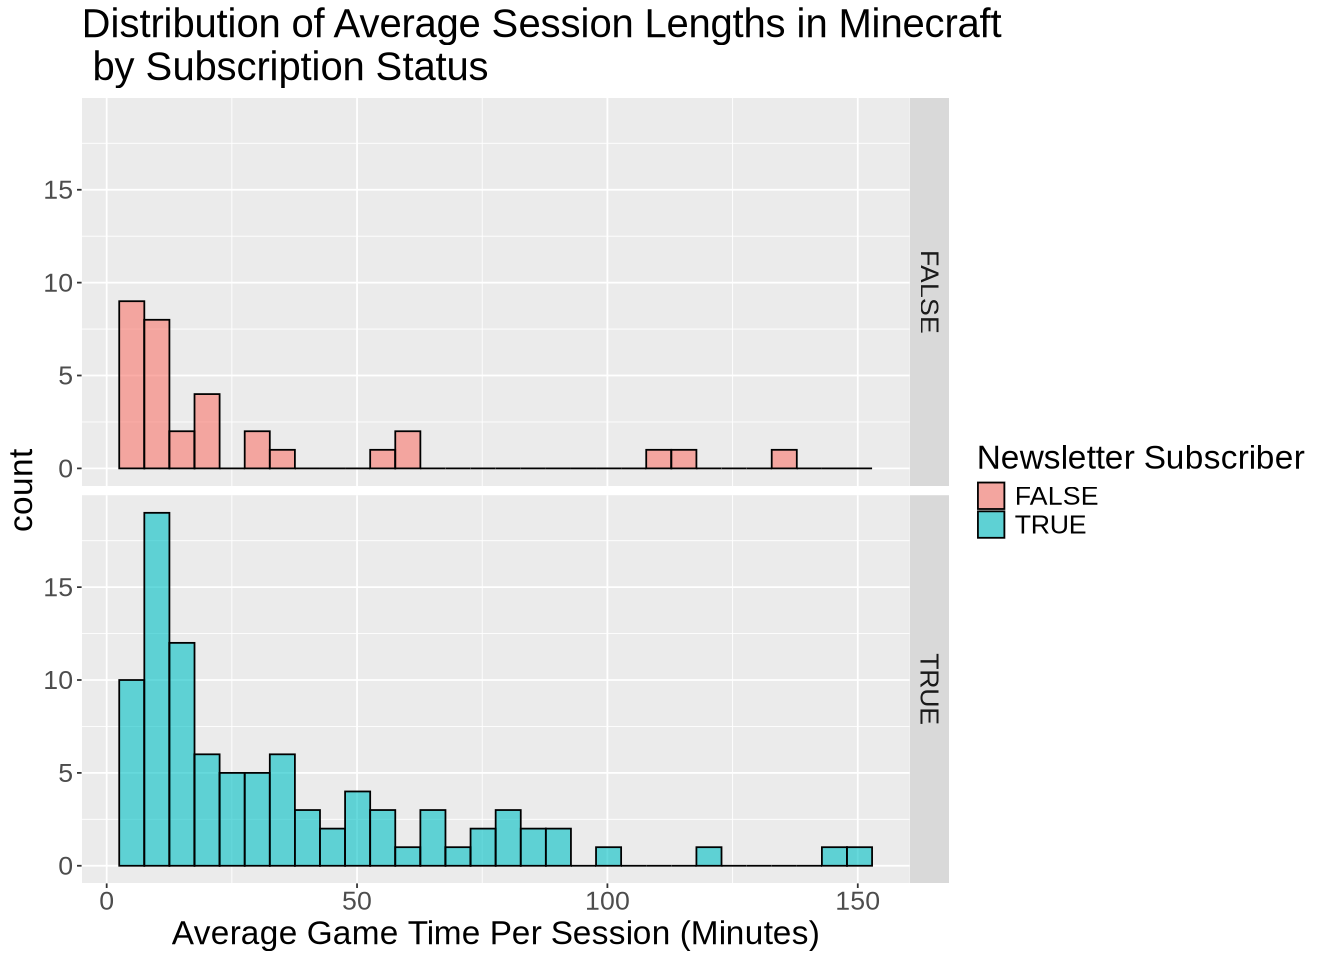

In [52]:
options(repr.plot.width = 11, repr.plot.height = 8)

session_histogram <- subscription_data |>
    ggplot(aes(x = average_session_length, fill = subscribe)) +
    geom_histogram(alpha = 0.6, position = "identity", colour = "black") +
    facet_grid(rows = vars(subscribe)) +
    labs(x = "Average Game Time Per Session (Minutes)", fill = "Newsletter Subscriber") +
    ggtitle("Distribution of Average Session Lengths in Minecraft \n by Subscription Status") +
    theme(text = element_text(size=20))
session_histogram

Warning message:
“Removed 73 rows containing missing values or values outside the scale range
(`geom_point()`).”


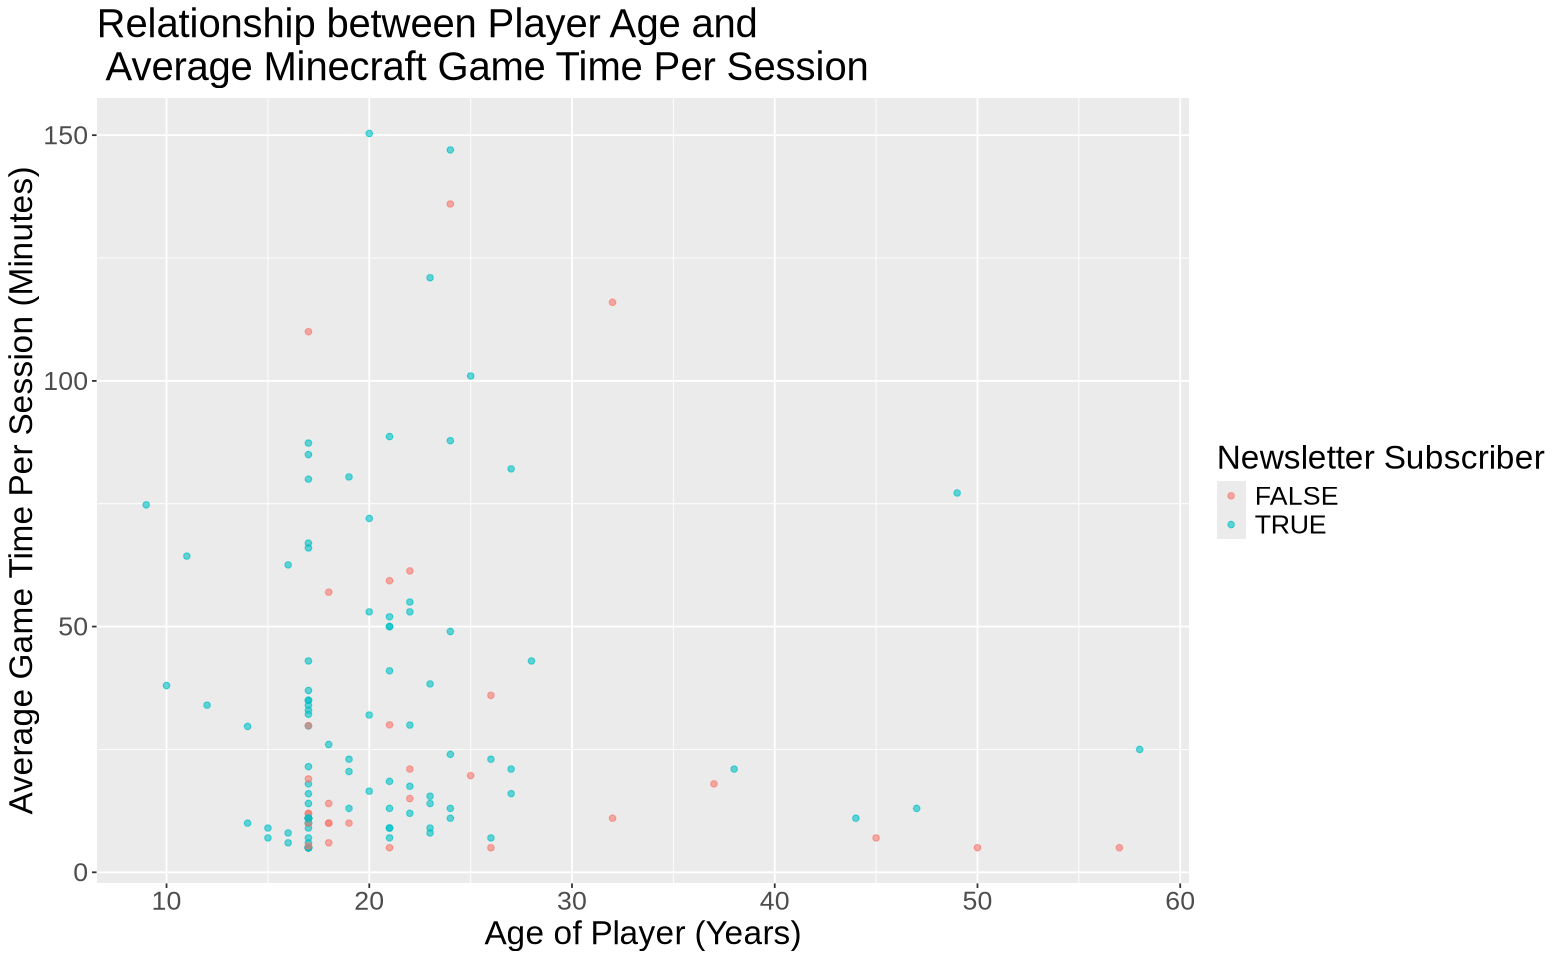

In [54]:
options(repr.plot.width = 13, repr.plot.height = 8)

age_session_plot <- subscription_data |>
    ggplot(aes(x = Age, y = average_session_length)) +
    geom_point(aes(color = subscribe), alpha = 0.6) +
    labs(x = "Age of Player (Years)", y = "Average Game Time Per Session (Minutes)", color = "Newsletter Subscriber") +
    ggtitle("Relationship between Player Age and \n Average Minecraft Game Time Per Session") +
    theme(text = element_text(size=20))
age_session_plot

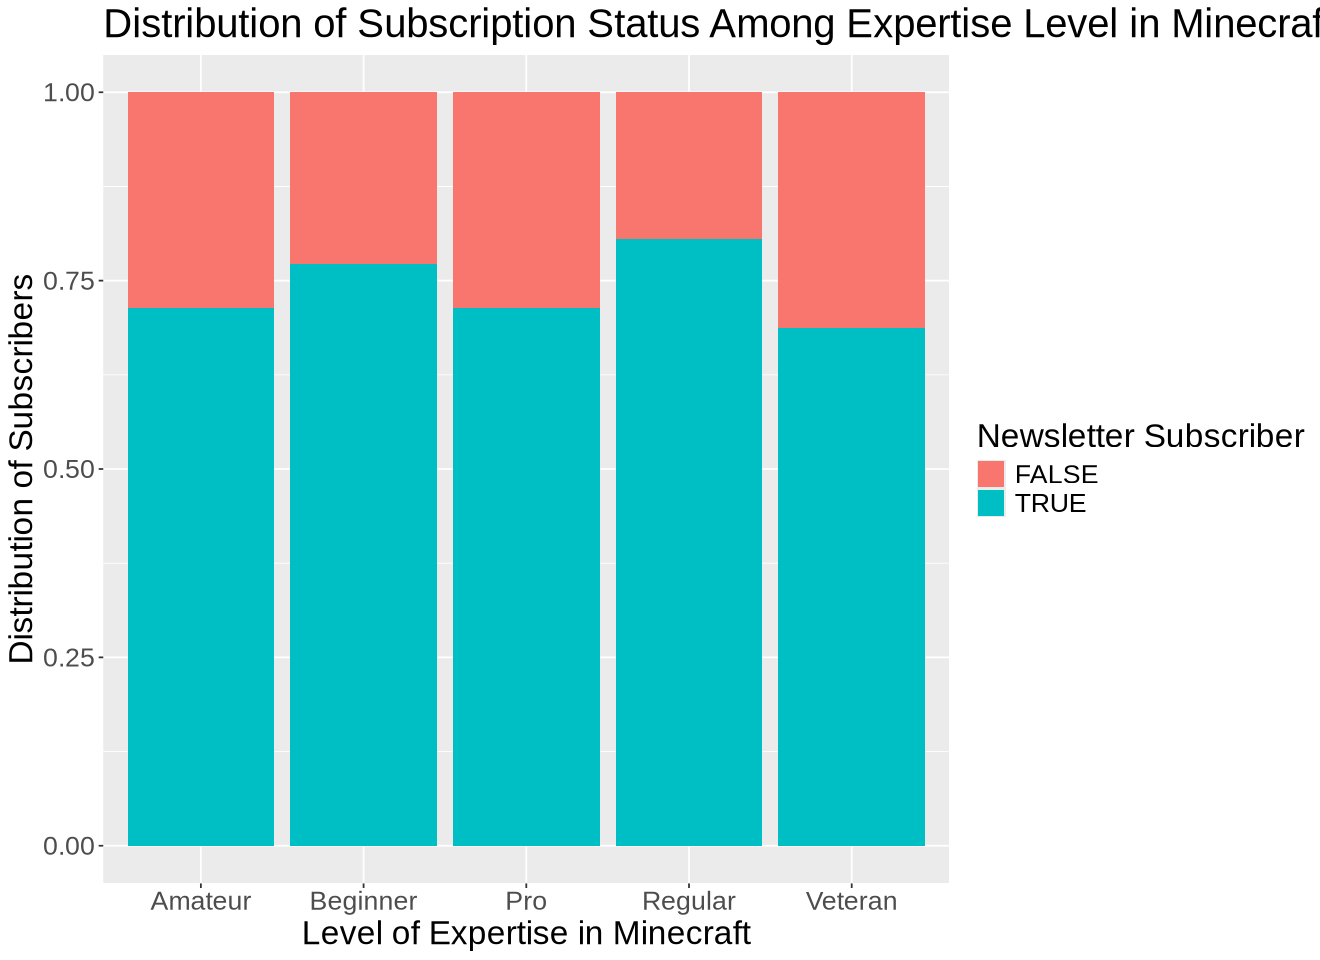

In [65]:
options(repr.plot.width = 11, repr.plot.height = 8)

experience_plot <- subscription_data |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "fill") +
    labs( x = "Level of Expertise in Minecraft", y = "Distribution of Subscribers", fill = "Newsletter Subscriber") +
    ggtitle("Distribution of Subscription Status Among Expertise Level in Minecraft") +
    theme(text = element_text(size = 20))
experience_plot